Name : Rutuja Ashok JAdhav
Roll no : 4157

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [ ]:
img_rows,img_cols=28,28
num_classes=10


In [ ]:
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [ ]:
input_shape=(img_rows,img_cols,1)

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /=255
x_test /=255

In [ ]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')

])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
batch_size=128
epochs = 10

In [ ]:
history = model.fit(x_train,y_train,batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 72s 151ms/step - loss: 0.7053 - accuracy: 0.7400 - val_loss: 0.4593 - val_accuracy: 0.8310
Epoch 2/10
469/469 [==============================] - 68s 144ms/step - loss: 0.4686 - accuracy: 0.8317 - val_loss: 0.3794 - val_accuracy: 0.8644
Epoch 3/10
469/469 [==============================] - 67s 143ms/step - loss: 0.4052 - accuracy: 0.8531 - val_loss: 0.3357 - val_accuracy: 0.8786
Epoch 4/10
469/469 [==============================] - 68s 145ms/step - loss: 0.3724 - accuracy: 0.8659 - val_loss: 0.3186 - val_accuracy: 0.8841
Epoch 5/10
469/469 [==============================] - 79s 168ms/step - loss: 0.3509 - accuracy: 0.8724 - val_loss: 0.3044 - val_accuracy: 0.8911
Epoch 6/10
469/469 [==============================] - 102s 218ms/step - loss: 0.3376 - accuracy: 0.8779 - val_loss: 0.2935 - val_accuracy: 0.8921
Epoch 7/10
469/469 [==============================] - 78s 167ms/step - loss: 0.3222 - accuracy: 0.8827 - val_loss: 0.2899 - val_a

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print("test loss : ",score[0])
print("Test Accuraccy : ",score[1])

test loss :  0.28369489312171936
Test Accuraccy :  0.8952999711036682


In [ ]:
pred=model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [ ]:
labels= np.argmax(pred,axis=1)

In [ ]:
num_images = 10 
random_indices = np.random.choice(x_test.shape[0],num_images,replace=False)

In [ ]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

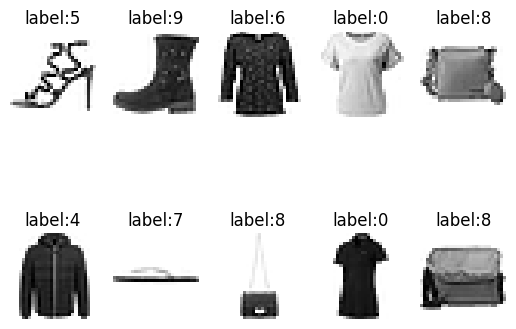

In [ ]:
for i in range(num_images):
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[random_indices[i]].reshape(28,28),cmap=plt.cm.gray_r)
  plt.title(f"label:{labels[random_indices[i]]}")
  plt.axis('off')
plt.show()